In [40]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [41]:
from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [46]:
seoul = pd.read_csv("data/utf_서울시분석데이터.csv")
seoul.rename(columns = {'행정구역별(시군구)':'행정구역'}, inplace = True)
seoul.set_index('행정구역', inplace=True)
display(seoul)

고령가구    단독주택     아파트  연립주택  다세대주택   미취학남   10대남   20대남   30대남   40대남  \
행정구역                                                                          
종로구    8079   26058   13725  5069  10831   4243   7638  14779  11021  11516   
중구     6990   14953   22632  1812   5992   3912   4106  10679  11036   9755   
용산구   11019   35013   32303  3274  14669   8005   8275  16910  20758  18408   
성동구   12806   40315   62635  1976   9324  11583  11224  25360  26500  24205   
광진구   14132   69001   29976  4047  32760  11706  14841  32173  30494  27608   
동대문구  18402   56104   59105  2944  14540  11703  13806  33156  27794  27017   
중랑구   20564   67652   50481  4305  28569  13358  15064  27889  31776  30225   
성북구   20665   60090   70627  5733  24897  15834  20676  35718  30790  35060   
강북구   19812   47995   32677  4656  36339   9579  12295  21089  22304  24509   
도봉구   18405   27746   63020  4010  25949  11247  14470  22154  22523  25039   
노원구   26922   22640  156631  3370  13861  19345  30847  39983  34604  43544   
은평구   23760   45599   51690  5938  65742  16871  20985  30083  34720  37790   
서대문구  15457   41326   47391  5056  24688  10438  12899  27280  22524  23600   
마포구   15015   39233   64158  2955  30833  13727  14714  28752  31854  30165   
양천구   18175   28261   84290  4002  37001  17455  26862  28987  30037  38397   
강서구   26044   36509  108059  4601  58484  23567  23747  39169  53138  45681   
구로구   19495   32744   74148  6916  24492  16592  16537  28083  37020  37020   
금천구   12037   32513   30079  3718  19446   7812   8386  18760  21832  20499   
영등포구  17453   41225   66872  1394  12429  13933  13054  27312  37667  32788   
동작구   18154   57863   58639  5073  31043  13819  15532  34869  33236  30232   
관악구   23331  100395   53501  6395  40564  14115  16552  53747  50779  38429   
서초구   14938   27244   88070  5101  23439  18313  21568  25302  30408  35924   
강남구   20376   37540  115144  5297  26192  18857  28678  32999  38356  43973   
송파구   23924   39123  116842  4664  62801  26791  30483  42770  52770  51220   
강동구   18166   45816   67644  3424  31149  16151  19721  27830  33007  33238   

      ...     2인     3인     4인     5인    6인   7인    인구밀도  소상공인사업체수  소상공인종사자  \
행정구역  ...                                                                     
종로구   ...  15957  11241   8286   2228   573  162   6,817    31,923   60,307   
중구    ...  14101   9601   6463   1591   433  110  13,618    51,237  108,596   
용산구   ...  24574  17717  12098   3019   681  171  11,209    15,630   29,532   
성동구   ...  32135  26002  19548   4273  1035  264  18,771    20,946   44,075   
광진구   ...  35093  28596  22354   4947  1079  329  21,746    19,595   37,337   
동대문구  ...  35628  27612  21139   5341  1321  340  25,630    26,716   50,724   
중랑구   ...  42934  34055  25381   6159  1353  355  22,067    23,941   44,153   
성북구   ...  42140  36301  29176   7067  1665  458  18,218    18,988   35,358   
강북구   ...  34781  26543  19222   4748  1077  308  13,683    15,675   27,723   
도봉구   ...  35343  30077  23237   5292  1146  343  16,531    15,852   26,990   
노원구   ...  51939  47672  40995   8517  1542  381  15,468    21,445   35,564   
은평구   ...  50617  40750  31086   7833  1682  482  16,415    20,712   33,858   
서대문구  ...  31734  25206  19423   4641  1082  316  18,331    15,716   27,033   
마포구   ...  38861  29938  22671   5233  1108  292  16,199    27,080   53,727   
양천구   ...  40185  41534  36359   7768  1502  387  26,894    21,006   37,484   
강서구   ...  62155  50204  39017   9061  1807  499  14,567    29,659   54,588   
구로구   ...  41836  34633  27310   6479  1425  401  21,793    30,456   57,233   
금천구   ...  24305  18948  14102   3388   769  222  19,510    23,686   52,639   
영등포구  ...  37774  29904  22271   5038  1086  281  16,441    31,982   60,800   
동작구   ...  39300  32597  25296   5811  1277  342  25,032    15,673   28,642   
관악구   ...  54106  35925  25997   6172  1451  377  17,587    21,117   37,204   
서초구   ...  38475  35620  31029   7112  1598  447   9,326

In [81]:
from numpy import *
house = pd.read_csv("data/주거유형.csv")
house_sort = house.sort_values(by='유리병kg' ,ascending=False)
house_sort['아파트 score'] = (house_sort['아파트'] - mean(house_sort['아파트'], axis=0)) / std(house_sort['아파트'], axis=0)
house_sort['단독주택 score'] = (house_sort['단독주택'] - mean(house_sort['단독주택'], axis=0)) / std(house_sort['단독주택'], axis=0)
house_sort['연립주택 score'] = (house_sort['연립주택'] - mean(house_sort['연립주택'], axis=0)) / std(house_sort['연립주택'], axis=0)
house_sort['다세대주택 score'] = (house_sort['다세대주택'] - mean(house_sort['다세대주택'], axis=0)) / std(house_sort['다세대주택'], axis=0)
display(house_sort)

고령가구    단독주택     아파트  연립주택  다세대주택  유리병kg  아파트 score  단독주택 score  \
21  14938   27244   88070  5101  23439  46900   0.715918   -0.882768   
23  23924   39123  116842  4664  62801  37600   1.601625   -0.213750   
22  20376   37540  115144  5297  26192  37000   1.549354   -0.302904   
5   18402   56104   59105  2944  14540  33100  -0.175730    0.742610   
6   20564   67652   50481  4305  28569  32600  -0.441208    1.392986   
24  18166   45816   67644  3424  31149  30500   0.087131    0.163196   
13  15015   39233   64158  2955  30833  21500  -0.020181   -0.207555   
0    8079   26058   13725  5069  10831  19500  -1.572692   -0.949563   
8   19812   47995   32677  4656  36339  19200  -0.989280    0.285916   
18  17453   41225   66872  1394  12429  15300   0.063366   -0.095367   
4   14132   69001   29976  4047  32760  14000  -1.072427    1.468961   
17  12037   32513   30079  3718  19446  12000  -1.069256   -0.586021   
1    6990   14953   22632  1812   5992  11700  -1.298502   -1.574990   
12  15457   41326   47391  5056  24688  10900  -0.536330   -0.089679   
19  18154   57863   58639  5073  31043  10700  -0.190075    0.841676   
20  23331  100395   53501  6395  40564  10700  -0.348242    3.237053   
15  26044   36509  108059  4601  58484  10300   1.331252   -0.360969   
9   18405   27746   63020  4010  25949   8800  -0.055212   -0.854496   
2   11019   35013   32303  3274  14669   7900  -1.000793   -0.445223   
3   12806   40315   62635  1976   9324   6900  -0.067064   -0.146617   
7   20665   60090   70627  5733  24897   6000   0.178959    0.967099   
16  19495   32744   74148  6916  24492   3600   0.287348   -0.573012   
10  26922   22640  156631  3370  13861   3500   2.826475   -1.142063   
11  23760   45599   51690  5938  65742   3000  -0.403991    0.150974   
14  18175   28261   84290  4002  37001   1000   0.599556   -0.825492   

    연립주택 score  다세대주택 score  
21    0.639002    -0.310366  
23    0.318695     2.233514  
22    0.782664    -0.132446  
5    -0.942011    -0.885489  
6     0.055559     0.021175  
24   -0.590186     0.187914  
13   -0.933948     0.167492  
0     0.615547    -1.125194  
8     0.312831     0.523333  
18   -2.078112    -1.021918  
4    -0.133547     0.292030  
17   -0.374693    -0.568425  
1    -1.771731    -1.437928  
12    0.606018    -0.229646  
19    0.618479     0.181064  
20    1.587463     0.796385  
15    0.272518     1.954516  
9    -0.160667    -0.148150  
2    -0.700131    -0.877152  
3    -1.651525    -1.222588  
7     1.102238    -0.216139  
16    1.969340    -0.242313  
10   -0.629767    -0.929371  
11    1.252497     2.423585  
14   -0.166530     0.566116

In [85]:
age = pd.read_csv("data/연령.csv")
age_sort = age.sort_values(by='유리병kg' ,ascending=False)
age_sort['미취학남 score'] = (age_sort['미취학남'] - mean(age_sort['미취학남'], axis=0)) / std(age_sort['미취학남'], axis=0)
age_sort['미취학여 score'] = (age_sort['미취학여'] - mean(age_sort['미취학여'], axis=0)) / std(age_sort['미취학여'], axis=0)
age_sort['30대여 score'] = (age_sort['30대여'] - mean(age_sort['30대여'], axis=0)) / std(age_sort['30대여'], axis=0)
age_sort['40대여 score'] = (age_sort['40대여'] - mean(age_sort['40대여'], axis=0)) / std(age_sort['40대여'], axis=0)

display(age_sort)

미취학남   10대남   20대남   30대남   40대남   50대남   미취학여   10대여   20대여   30대여  \
21  18313  21568  25302  30408  35924  28998  17222  21122  27783  35008   
23  26791  30483  42770  52770  51220  48340  25069  28719  45742  56752   
22  18857  28678  32999  38356  43973  37569  17719  26224  35844  44561   
5   11703  13806  33156  27794  27017  26620  11027  14266  34250  25862   
6   13358  15064  27889  31776  30225  33849  12685  14283  27804  29485   
24  16151  19721  27830  33007  33238  33547  15092  17437  27015  32540   
13  13727  14714  28752  31854  30165  25106  13288  14708  34715  34624   
0    4243   7638  14779  11021  11516  12301   4095   7112  15393  10824   
8    9579  12295  21089  22304  24509  25063   9104  11804  22162  20291   
18  13933  13054  27312  37667  32788  33890  13489  11705  29279  34219   
4   11706  14841  32173  30494  27608  27745  11085  14478  35578  30636   
17   7812   8386  18760  21832  20499  23942   7431   8129  17403  17659   
1    3912   4106  10679  11036   9755  10346   3816   4676  11534  10692   
12  10438  12899  27280  22524  23600  22903  10123  14200  35285  23004   
19  13819  15532  34869  33236  30232  28356  13350  14903  35995  32260   
20  14115  16552  53747  50779  38429  35230  13306  15894  54945  42349   
15  23567  23747  39169  53138  45681  42287  22512  23060  43262  51526   
9   11247  14470  22154  22523  25039  27275  10538  13876  22229  21566   
2    8005   8275  16910  20758  18408  17005   7560   8243  18324  19477   
3   11583  11224  25360  26500  24205  24049  11190  11315  25332  26474   
7   15834  20676  35718  30790  35060  31796  14991  21206  39511  30885   
16  16592  16537  28083  37020  37020  36737  16035  15305  28497  34561   
10  19345  30847  39983  34604  43544  42210  18315  28769  38053  35053   
11  16871  20985  30083  34720  37790  35524  15950  19936  31309  34821   
14  17455  26862  28987  30037  38397  37710  16500  24636  27900  30743   

     40대여   50대여  유리병kg  미취학남 score  미취학여 score  30대여 score  40대여 score  
21  39262  31106  46900    0.829714    0.804430    0.404065    0.730173  
23  54199  52908  37600    2.445029    2.397528    2.413154    2.088859  
22  49336  38942  37000    0.933362    0.905331    1.286737    1.646515  
5   25559  27549  33100   -0.429691   -0.453279   -0.441002   -0.516266  
6   29164  35917  32600   -0.114364   -0.116672   -0.106246   -0.188351  
24  33404  36353  30500    0.417787    0.371998    0.176028    0.197324  
13  31043  26839  21500   -0.044058    0.005750    0.368584   -0.017435  
0   11858  12729  19500   -1.851047   -1.860614   -1.830474   -1.762523  
8   24029  27211  19200   -0.834378   -0.843686   -0.955748   -0.655436  
18  29524  33569  15300   -0.004809    0.046557    0.331163   -0.155605  
4   28174  29809  14000   -0.429120   -0.441504    0.000103   -0.278403  
17  18232  23553  12000   -1.171045   -1.183339   -1.198938   -1.182737  
1    9243  10723  11700   -1.914113   -1.917256   -1.842670   -2.000386  
12  24059  24781  10900   -0.670712   -0.636809   -0.705073   -0.652707  
19  29773  31541  10700   -0.026529    0.018337    0.150157   -0.132956  
20  33782  37756  10700    0.029868    0.009404    1.082354    0.231707  
15  45418  47282  10300    1.830760    1.878406    1.930285    1.290130  
9   26039  30427   8800   -0.516573   -0.552556   -0.837941   -0.472605  
2   18306  17718   7900   -1.134272   -1.157149   -1.030959   -1.176006  
3   23697  24669   6900   -0.452555   -0.420186   -0.384454   -0.685635  
7   35424  33730   6000    0.357389    0.351493    0.023110    0.381065  
16  33326  37268   3600    0.501811    0.563446    0.362763    0.190229  
10  47605  45185   3500    1.026341    1.026331    0.408223    1.489062  
11  38568  39137   3000    0.554969    0.546189    0.386787    0.667046  
14  41843  38518   1000    0.666239    0.657850    0.009990    0.964944

In [50]:
house_num = pd.read_csv("data/가구형태.csv")

In [79]:
etc = pd.read_csv("data/기타.csv")
etc_sort = etc.sort_values(by='유리병kg' ,ascending=False)
display(etc_sort)

인구밀도  소상공인사업체수  소상공인종사자  유리병kg
21   9326     31238    63142  46900
23  19883     35868    69686  37600
22  13859     46104    95028  37000
5   25630     26716    50724  33100
6   22067     23941    44153  32600
24  17564     24421    43298  30500
13  16199     27080    53727  21500
0    6817     31923    60307  19500
8   13683     15675    27723  19200
18  16441     31982    60800  15300
4   21746     19595    37337  14000
17  19510     23686    52639  12000
1   13618     51237   108596  11700
12  18331     15716    27033  10900
19  25032     15673    28642  10700
20  17587     21117    37204  10700
15  14567     29659    54588  10300
9   16531     15852    26990   8800
2   11209     15630    29532   7900
3   18771     20946    44075   6900
7   18218     18988    35358   6000
16  21793     30456    57233   3600
10  15468     21445    35564   3500
11  16415     20712    33858   3000
14  26894     21006    37484   1000

In [ ]:
child = pd.read_csv("data/자녀.csv")
child_sort = child.sort_values(by='자녀수' ,ascending=False)
bottle_sort = child.sort_values(by='유리병kg' ,ascending=False)
display(child_sort)
display(bottle_sort)

In [78]:
import pandas as pd
import json
import folium
geo_path = 'data/seoul_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
fmap=folium.Choropleth(geo_data = geo_str,
               data = child,
               columns = ['행정구역', '유리병kg'],
               fill_color = 'YlGnBu', #puRd, YlGnBu
               key_on='feature.properties.name').add_to(map)
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)
display(map)

In [86]:
guname = ['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구',
         '동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']

df = pd.DataFrame({'행정구역':guname,
                   '아파트':house['아파트'],
                  })

import pandas as pd
import json
import folium
geo_path = 'data/seoul_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
fmap=folium.Choropleth(geo_data = geo_str,
               data = df,
               columns = ['행정구역', '아파트'],
               fill_color = 'YlGnBu', #puRd, YlGnBu
               key_on='feature.properties.name').add_to(map)
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)
display(map)

In [96]:
guname = ['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구',
         '동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']

df = pd.DataFrame({'행정구역':guname,
                   '30대여':age['40대여']+age['미취학남']+age['미취학여'],
                  })

import pandas as pd
import json
import folium
geo_path = 'data/seoul_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
fmap=folium.Choropleth(geo_data = geo_str,
               data = df,
               columns = ['행정구역', '30대여'],
               fill_color = 'YlGnBu', #puRd, YlGnBu
               key_on='feature.properties.name').add_to(map)
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)
display(map)

In [101]:
sc = pd.read_csv("data/서초구.csv")
sc['미취학남 score'] = (sc['미취학남'] - mean(sc['미취학남'], axis=0)) / std(sc['미취학남'], axis=0)
sc['미취학여 score'] = (sc['미취학여'] - mean(sc['미취학여'], axis=0)) / std(sc['미취학여'], axis=0)
sc['30대여 score'] = (sc['30대여'] - mean(sc['30대여'], axis=0)) / std(sc['30대여'], axis=0)
sc['40대여 score'] = (sc['40대여'] - mean(sc['40대여'], axis=0)) / std(sc['40대여'], axis=0)
sc['total score'] = sc['미취학남 score'] + sc['미취학여 score'] + sc['30대여 score'] + sc['40대여 score']
sc_sort = sc.sort_values(by='total score' ,ascending=False)
display(sc_sort)

행정구역  미취학남  미취학여  30대여  40대여  미취학남 score  미취학여 score  30대여 score  \
15  양재1동  2587  2344  4005  3941    3.131804    3.023409    2.555548   
6   반포1동  1573  1543  3203  3157    1.063276    1.239138    1.526083   
4    잠원동  1473  1336  2942  3657    0.859280    0.778035    1.191058   
3   서초4동  1603  1531  2281  3349    1.124475    1.212408    0.342584   
2   서초3동   925   847  2519  2527   -0.258623   -0.311239    0.648086   
14  방배4동   876   864  2042  2375   -0.358581   -0.273370    0.035799   
16  양재2동   924   782  2294  1896   -0.260663   -0.456030    0.359271   
17   내곡동  1190  1164  1664  1411    0.281969    0.394896   -0.449410   
8   반포3동   978   916  1460  2310   -0.150504   -0.157538   -0.711269   
0   서초1동   836   800  2078  1955   -0.440180   -0.415934    0.082009   
9   반포4동   954   856  1661  1945   -0.199463   -0.291191   -0.453261   
7   반포2동  1087   951  1091  1955    0.071852   -0.079573   -1.184925   
10  방배본동   793   809  1441  2268   -0.527898   -0.395886   -0.735658   
1   서초2동   744   746  1982  1648   -0.627857   -0.536222   -0.041219   
13  방배3동   711   708  1590  1814   -0.695176   -0.620869   -0.544398   
12  방배2동   696   661  1758  1695   -0.725775   -0.725564   -0.328750   
11  방배1동   627   602  1714  1509   -0.866533   -0.856989   -0.385229   
5   반포본동   355   301   529  1463   -1.421404   -1.527483   -1.906321   

    40대여 score  total score  
15    2.231485    10.942245  
6     1.183994     5.012493  
4     1.852037     4.680410  
3     1.440523     4.119990  
2     0.342261     0.420485  
14    0.139176    -0.456977  
16   -0.500809    -0.858230  
17   -1.148811    -0.921356  
8     0.052330    -0.966981  
0    -0.421980    -1.196085  
9    -0.435341    -1.379256  
7    -0.421980    -1.614627  
10   -0.003786    -1.663227  
1    -0.832159    -2.037455  
13   -0.610368    -2.470811  
12   -0.769362    -2.549451  
11   -1.017874    -3.126626  
5    -1.079334    -5.934542

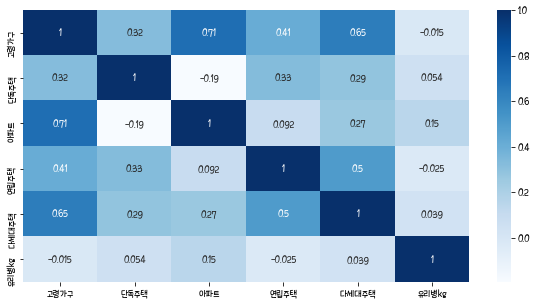

In [98]:
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(house.corr(), annot = True, cmap = 'Blues')
plt.show()

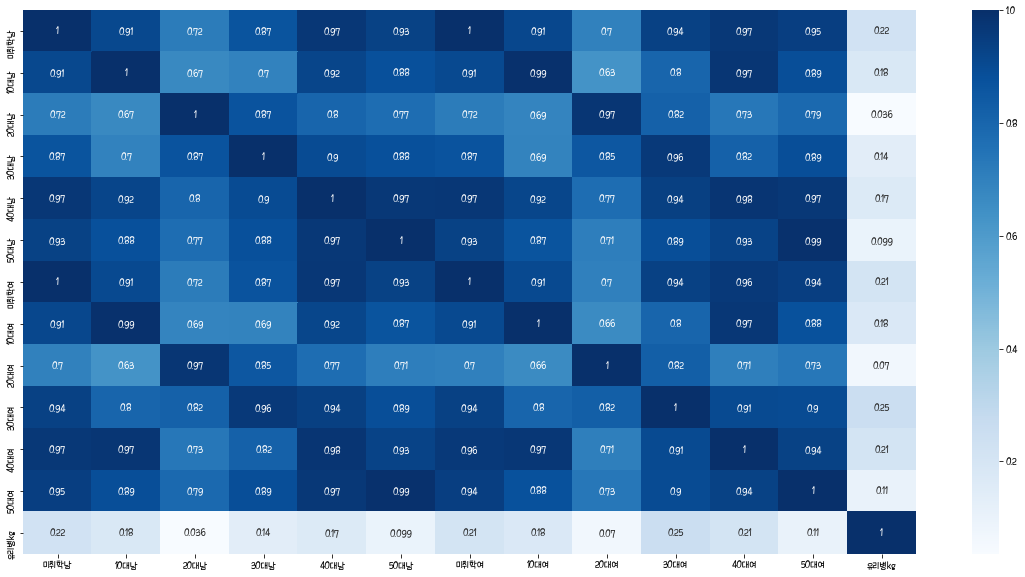

In [53]:
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(age.corr(), annot = True, cmap = 'Blues')
plt.show()

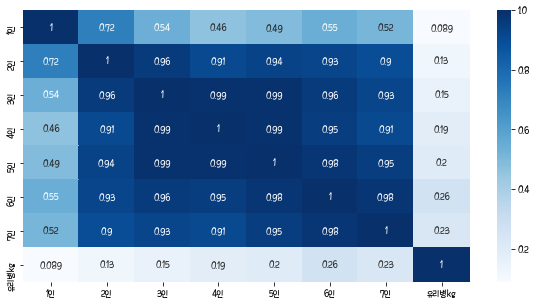

In [99]:
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(house_num.corr(), annot = True, cmap = 'Blues')
plt.show()

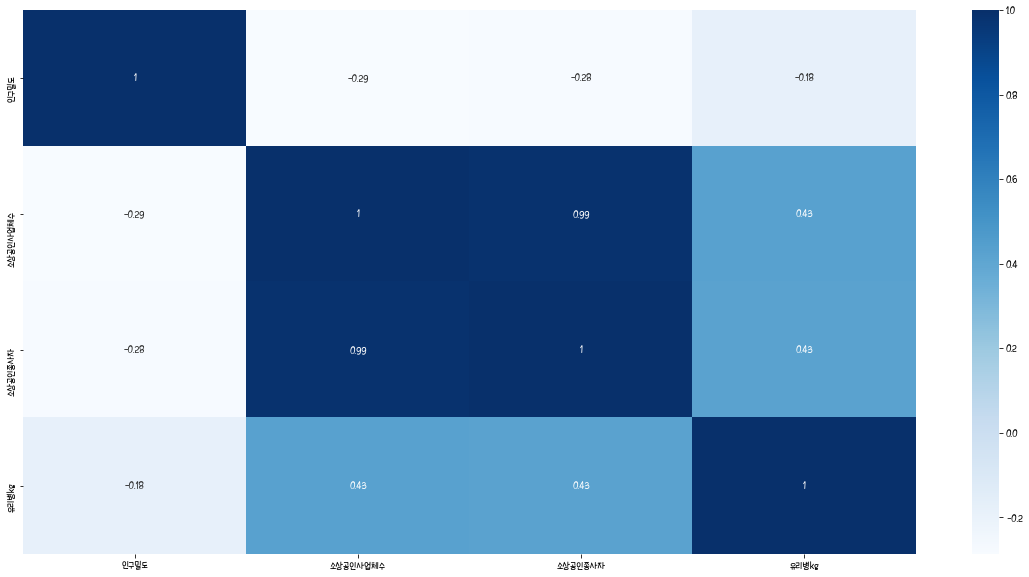

In [58]:
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(etc.corr(), annot = True, cmap = 'Blues')
plt.show()

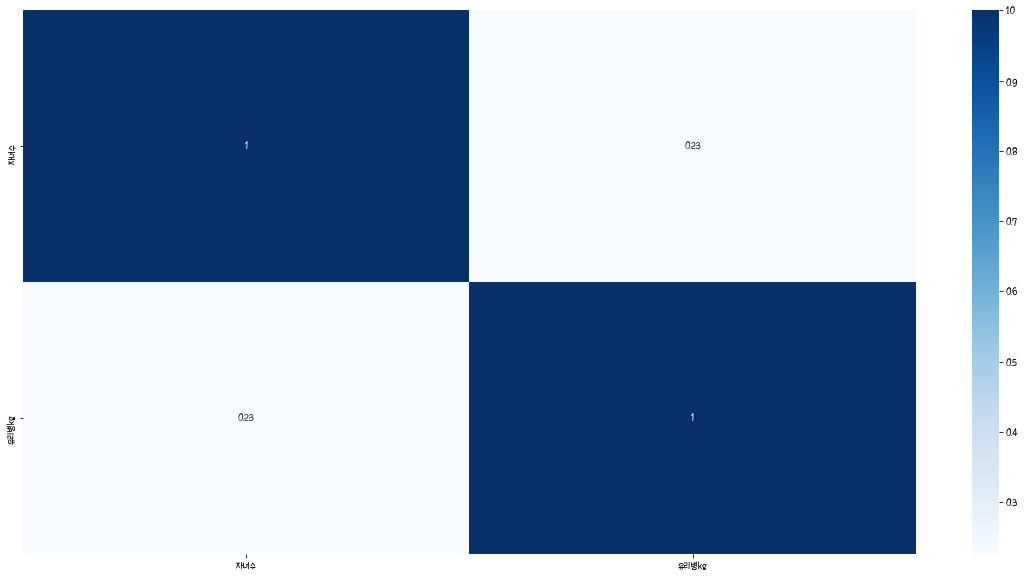

In [63]:
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(child.corr(), annot = True, cmap = 'Blues')
plt.show()

In [18]:
x_data2 = seoul.drop(['유리병'], axis=1)
target = seoul[["유리병"]]

In [ ]:
display(x_data2)
display(target)

In [19]:
# 상수항 추가
x_data2_ = sm.add_constant(x_data2, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    유리병   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.011
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.529
Time:                        03:57:10   Log-Likelihood:                -82.910
No. Observations:                  25   AIC:                             201.8
Df Residuals:                       7   BIC:                             223.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4701     19.066      0.811      0.444     -29.614      60.555
고령가구           0.0018      0.004      0.440      0.673      -0.008       0.011
단독주택           0.0007      0.001      0.673      0.523      -0.002       0.003
아파트            0.0006      0.001      0.448      0.668      -0.002       0.004
연립주택           0.0018      0.003      0.536      0.608      -0.006       0.010
다세대주택          0.0002      0.001      0.184      0.859      -0.003       0.003
미취학남           0.0576      0.027      2.147      0.069      -0.006       0.121
10대남           0.0066      0.009      0.750      0.478      -0.014       0.027
20대남          -0.0022      0.004     -0.599      0.568      -0.011       0.007
30대남          -0.0033      0.004     -0.875      0.410      -0.012       0.006
40대남          -0.0024      0.011     -0.220      0.832      -0.028       0.024
50대남           0.0061      0.009      0.694      0.510      -0.015       0.027
미취학여          -0.0542      0.025     -2.149      0.069      -0.114       0.005
10대여          -0.0099      0.013     -0.788      0.456      -0.039       0.020
20대여           0.0020      0.003      0.645      0.540      -0.005       0.009
30대여           0.0033      0.004      0.733      0.487      -0.007       0.014
40대여          -0.0010      0.011     -0.094      0.927      -0.026       0.024
50대여          -0.0068      0.009     -0.743      0.482      -0.028       0.015
==============================================================================
Omnibus:                        1.968   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                0.801
Skew:                          -0.367   Prob(JB):                        0.670
Kurtosis:                       3.478   Cond. No.                     9.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
x_data2.corr()

고령가구      단독주택       아파트      연립주택     다세대주택      미취학남      10대남  \
고령가구   1.000000  0.324161  0.712653  0.413696  0.647872  0.803400  0.780530   
단독주택   0.324161  1.000000 -0.194484  0.332163  0.287137  0.062300 -0.010756   
아파트    0.712653 -0.194484  1.000000  0.091568  0.266581  0.852936  0.892868   
연립주택   0.413696  0.332163  0.091568  1.000000  0.501281  0.311913  0.333880   
다세대주택  0.647872  0.287137  0.266581  0.501281  1.000000  0.656732  0.542123   
미취학남   0.803400  0.062300  0.852936  0.311913  0.656732  1.000000  0.913251   
10대남   0.780530 -0.010756  0.892868  0.333880  0.542123  0.913251  1.000000   
20대남   0.799486  0.610526  0.594283  0.396478  0.536051  0.717860  0.671543   
30대남   0.800308  0.415104  0.648312  0.331710  0.672879  0.866832  0.697338   
40대남   0.868363  0.186208  0.844016  0.379024  0.644103  0.971657  0.924264   
50대남   0.894479  0.200438  0.804278  0.327968  0.633589  0.934729  0.882709   
미취학여   0.803081  0.060299  0.853028  0.309836  0.653158  0.999507  0.907124   
10대여   0.783450  0.006014  0.890636  0.348349  0.547803  0.914454  0.994258   
20대여   0.746626  0.605090  0.550579  0.409175  0.555143  0.701916  0.631057   
30대여   0.767183  0.275160  0.742324  0.318501  0.676894  0.938103  0.801433   
40대여   0.820232  0.074323  0.883350  0.346379  0.615880  0.967665  0.973671   
50대여   0.914688  0.212125  0.799584  0.351569  0.687067  0.945212  0.887664   

           20대남      30대남      40대남      50대남      미취학여      10대여      20대여  \
고령가구   0.799486  0.800308  0.868363  0.894479  0.803081  0.783450  0.746626   
단독주택   0.610526  0.415104  0.186208  0.200438  0.060299  0.006014  0.605090   
아파트    0.594283  0.648312  0.844016  0.804278  0.853028  0.890636  0.550579   
연립주택   0.396478  0.331710  0.379024  0.327968  0.309836  0.348349  0.409175   
다세대주택  0.536051  0.672879  0.644103  0.633589  0.653158  0.547803  0.555143   
미취학남   0.717860  0.866832  0.971657  0.934729  0.999507  0.914454  0.701916   
10대남   0.671543  0.697338  0.924264  0.882709  0.907124  0.994258  0.631057   
20대남   1.000000  0.871105  0.802351  0.772309  0.717960  0.690292  0.974228   
30대남   0.871105  1.000000  0.901648  0.881221  0.869873  0.694259  0.854078   
40대남   0.802351  0.901648  1.000000  0.968483  0.971056  0.919670  0.771397   
50대남   0.772309  0.881221  0.968483  1.000000  0.934026  0.867747  0.712858   
미취학여   0.717960  0.869873  0.971056  0.934026  1.000000  0.908840  0.704222   
10대여   0.690292  0.694259  0.919670  0.867747  0.908840  1.000000  0.664493   
20대여   0.974228  0.854078  0.771397  0.712858  0.704222  0.664493  1.000000   
30대여   0.818119  0.964358  0.943292  0.888681  0.939570  0.801961  0.823122   
40대여   0.733567  0.819014  0.980012  0.931285  0.964624  0.970319  0.709492   
50대여   0.786625  0.888238  0.968197  0.993306  0.943856  0.877170  0.734037   

           30대여      40대여      50대여  
고령가구   0.767183  0.820232  0.914688  
단독주택   0.275160  0.074323  0.212125  
아파트    0.742324  0.883350  0.799584  
연립주택   0.318501  0.346379  0.351569  
다세대주택  0.676894  0.615880  0.687067  
미취학남   0.938103  0.967665  0.945212  
10대남   0.801433  0.973671  0.887664  
20대남   0.818119  0.733567  0.786625  
30대남   0.964358  0.819014  0.888238  
40대남   0.943292  0.980012  0.968197  
50대남   0.888681  0.931285  0.993306  
미취학여   0.939570  0.964624  0.943856  
10대여   0.801961  0.970319  0.877170  
20대여   0.823122  0.709492  0.734037  
30대여   1.000000  0.905692  0.899569  
40대여   0.905692  1.000000  0.935751  
50대여   0.899569  0.935751  1.000000

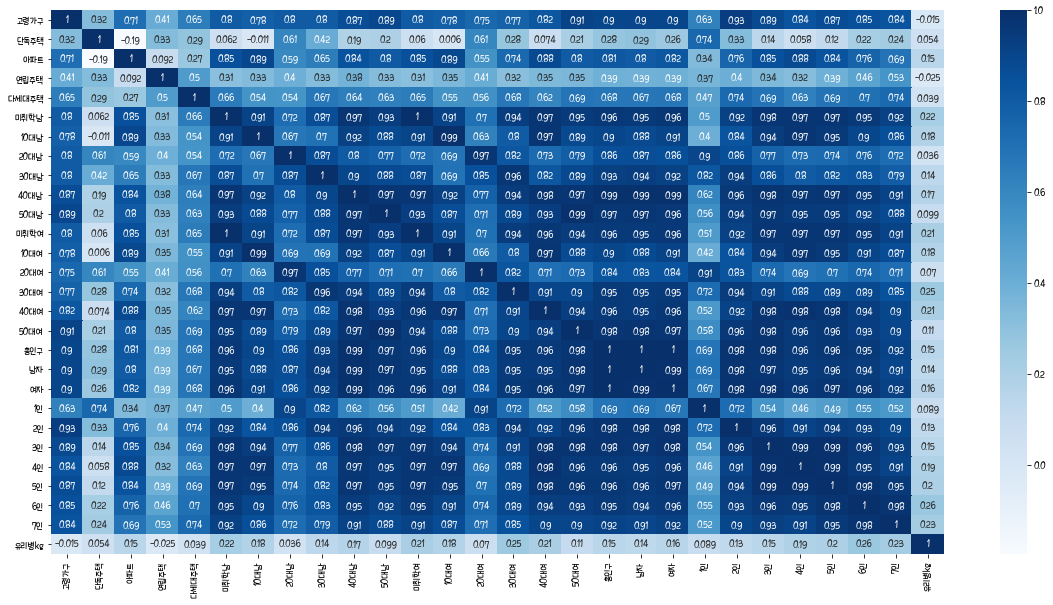

In [47]:
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(seoul.corr(), annot = True, cmap = 'Blues')
plt.show()

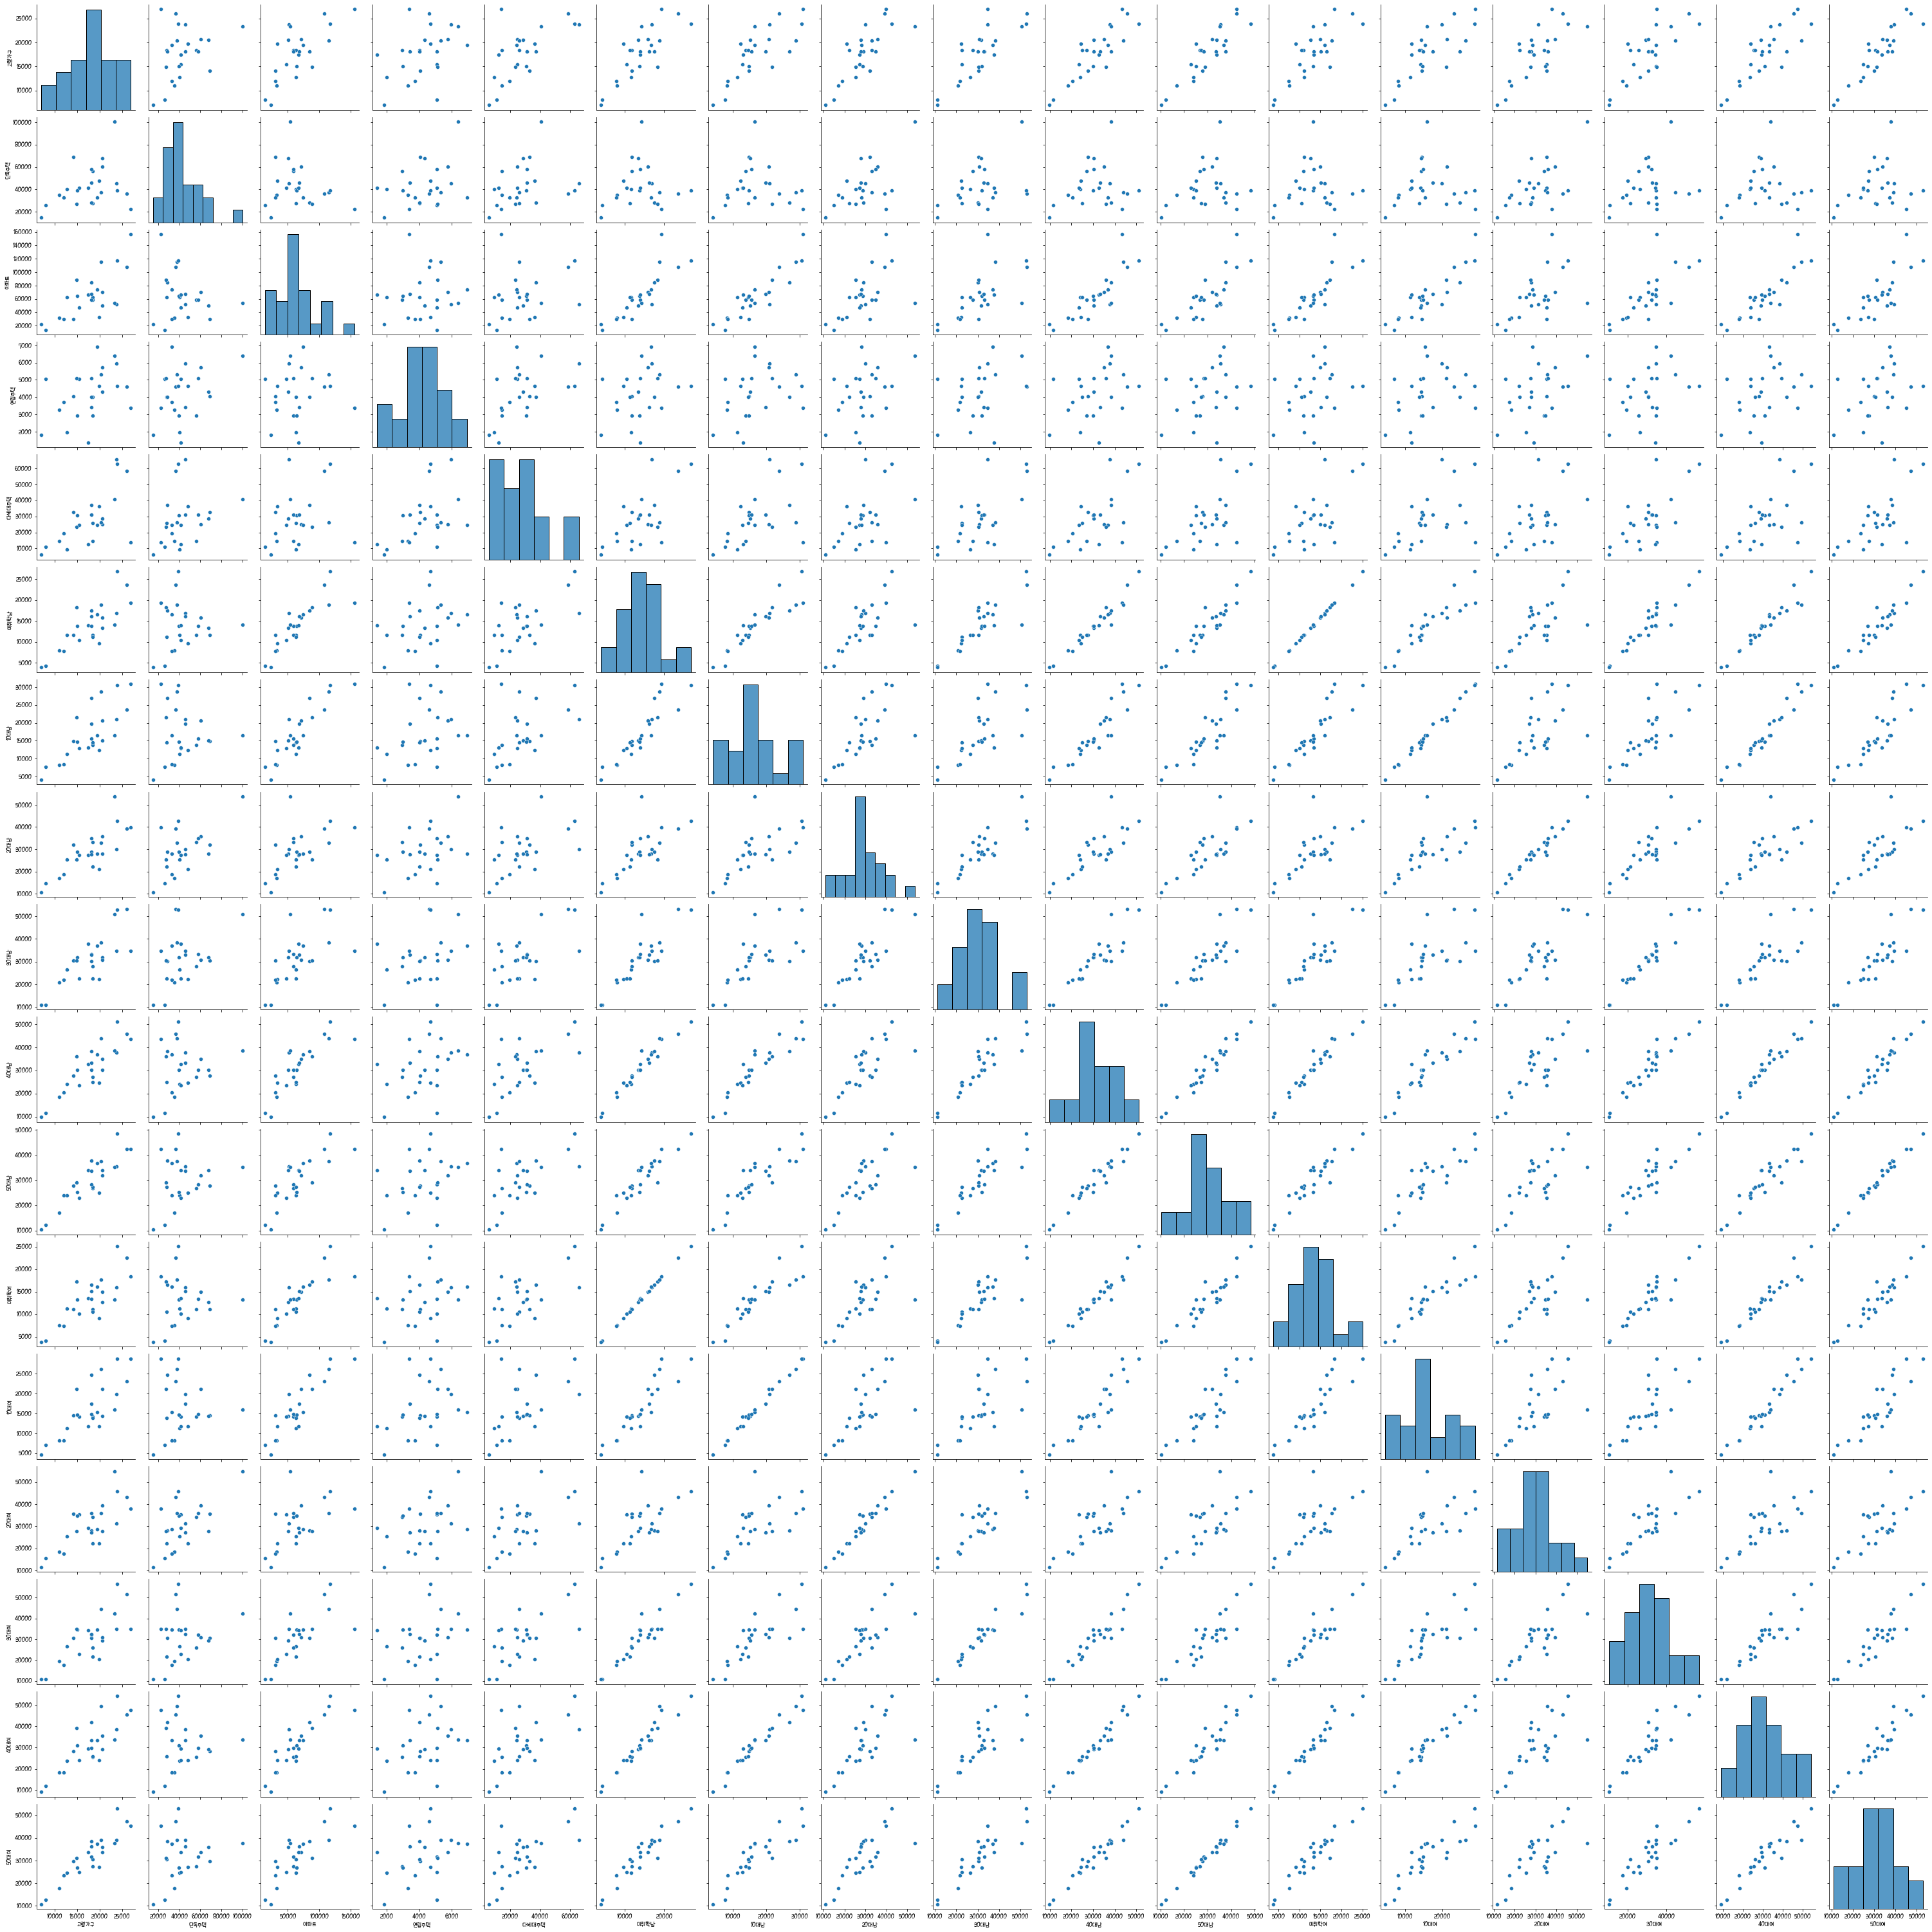

In [35]:
sns.pairplot(x_data2)
plt.show()